In this document we&rsquo;ll work through a simple approach to estimating
Constant Frisch Elasticity (CFE) demand systems.

There are two prerequisites; the first is the `CFEDemands` python
module, which can be installed with a simple:



In [1]:
!pip install CFEDemands

The second prerequisite is a dataset including detailed information on
household expenditures and characteristics.  The structure of that
dataset is detailed in the next section.



## Data



Consider the case in which the data are saved in a google sheet; we&rsquo;ll
turn data from these into `pandas` dataframes.  
There are limits on the allowable size of google sheets (5 million
cells), so if your dataset is larger than this you&rsquo;ll need some other
mechanism to get your data into such dataframes.  Even in this latter
case you&rsquo;ll want your dataframes to have a structure that matches the
description given below.



### Structure of the Spreadsheet



An example spreadsheet can be found at
[https://docs.google.com/spreadsheets/d/13Ig5hZif-NSHtgkKRp_cEgKXk0lOsdUB2BAD6O_FnRo/](https://docs.google.com/spreadsheets/d/13Ig5hZif-NSHtgkKRp_cEgKXk0lOsdUB2BAD6O_FnRo/).

This spreadsheet consists of two worksheets, labeled &ldquo;Expenditures&rdquo;
and &ldquo;Household Characteristics&rdquo;, respectively.

Each worksheet has the initial three columns labeled &ldquo;j&rdquo;, &ldquo;t&rdquo;, and
&ldquo;m&rdquo;; together these identify an observation uniquely.  The column &ldquo;j&rdquo;
should include a household id; the column &ldquo;t&rdquo; should include an
indicator for the year or period (for those of you with
cross-sectional data these will all take a common value, e.g., 2019);
the column &ldquo;m&rdquo; should be an indicator of &ldquo;market&rdquo;, which may be a
region identifier, or may take a single value (e.g., &ldquo;Malawi&rdquo;).

The triple (j,t,m) will serve as the index of some constructed
dataframes.  It is important not to have **too** many different values
for &ldquo;m&rdquo; (unless you have lots of RAM to play with).

Beyond the first three columns, the &ldquo;Expenditures&rdquo; worksheet should
have one column for each category of expenditures (e.g., &ldquo;Rice&rdquo;, &ldquo;Goat
meat&rdquo;, &ldquo;Millet&rdquo;,&#x2026;).

Beyond the first three columns, the &ldquo;Household Characteristics&rdquo; should
have columns corresponding to different elements of the vector of
observable characteristics $z$.  If the data allow, I recommend
constructing observables that match what I have in the ICRISAT data:
namely numbers of &ldquo;Men&rdquo;, &ldquo;Women&rdquo;, &ldquo;Boys&rdquo; and &ldquo;Girls&rdquo;; also the
logarithm of total household size (&ldquo;log HSize&rdquo;).



### From Sheet to DataFrame to Result Object



We begin by defining a dictionary that contains the spreadsheet key. 
One is provided for the Indian ICRISAT example that I wish to work
through.



In [2]:
Sheets = {'ICRISAT':'13Ig5hZif-NSHtgkKRp_cEgKXk0lOsdUB2BAD6O_FnRo',
         # 'Your dataset':'Your google spreadsheet key',
         }

With the spreadsheet defined , grab it and define a couple of
dataframes. Note that the spreadsheet must be public for this approach
to work!



In [3]:
import pandas as pd
import numpy as np

# The function below adapted from Gianmario Spacagna's suggestion at
# https://stackoverflow.com/questions/19611729/getting-google-spreadsheet-csv-into-a-pandas-dataframe
def dataframe_from_gspreadsheet(sheet_name, key):
    """Transform public google spreadsheet into pandas.DataFrame."""
    
    url = 'https://docs.google.com/spreadsheets/d/{key}/gviz/tq?tqx=out:csv&sheet={sheet_name}&headers=1'.format(
        key=key, sheet_name=sheet_name.replace(' ', '%20'))

    df = pd.read_csv(url)

    return df.drop([col for col in df.columns if col.startswith('Unnamed')], axis=1)

# Change 'ICRISAT' to key of your own sheet in Sheets, above
x = dataframe_from_gspreadsheet("Expenditures", Sheets['ICRISAT'])

# Change 'ICRISAT' to key of your own sheet in Sheets, above
z = dataframe_from_gspreadsheet("Household Characteristics", Sheets['ICRISAT'])

# Assume a single market: (Comment this out to make each village its own market)
z['m'] = 1
x['m'] = 1

# Take logs of expenditures; call this y
y = np.log(x.replace(0,np.nan).set_index(['j','t','m']))

z.set_index(['j','t','m'],inplace=True)

This gives a dataframe of household characteristics $z$ with a simple structure.



In [4]:
z.head()

,,,Men,Women,Boys,Girls,log Hsize
j,t,m,,,,,
A1,75,1,2,1,3,1,1.945910
A10,75,1,3,1,1,1,1.791759
A12,75,1,2,1,0,0,1.098612
A2,75,1,0,1,0,0,0.000000
A3,75,1,1,1,0,2,1.386294


Also a dataframe of log expenditures $y$ with a similarly simple
structure.  Note that any expenditures of zero are dropped and
replaced with a missing value indicator.



In [5]:
y.head()

,,,Other,Other Food,Other Narcotics,Clothing,"Medicine, cosmetics, etc.",Travel & Entertainment,Utilities,Domestic labor,Ceremonial expenses,Edible oils,...,Other spices,YB,YK,YZ,ZA,ZB,ZF,Gur (jaggery),ZJ,ZK
j,t,m,,,,,,,,,,,,,,,,,,,,,
A1,75,1,NaN,NaN,1.131402,5.552960,NaN,NaN,2.714695,NaN,NaN,2.406945,...,2.459589,NaN,NaN,NaN,NaN,NaN,NaN,-0.693147,NaN,NaN
A10,75,1,NaN,NaN,NaN,4.976734,NaN,NaN,2.525729,NaN,NaN,2.778819,...,3.010621,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
A12,75,1,NaN,NaN,NaN,1.098612,NaN,NaN,2.433613,NaN,NaN,2.054124,...,2.054124,NaN,NaN,NaN,NaN,NaN,NaN,-0.693147,NaN,NaN
A2,75,1,NaN,NaN,NaN,4.477337,NaN,NaN,2.251292,NaN,NaN,2.476538,...,2.174752,NaN,NaN,NaN,NaN,NaN,NaN,0.405465,NaN,NaN
A3,75,1,NaN,NaN,NaN,4.094345,NaN,NaN,2.163323,NaN,NaN,1.974081,...,1.945910,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN


With nothing more than this, we can estimate the demand system.  This
happens in two steps.  The first is the &ldquo;reduced form&rdquo; step:



In [6]:
import cfe

result = cfe.Result(y=y,z=z)

This creates a complicated &ldquo;Result&rdquo; object, with lots of different
attributes.  Note from below that attributes $y$ and $z$ are now defined.



In [7]:
result

<xarray.Result>
Dimensions:           (i: 160, j: 260, k: 5, m: 1, t: 10)
Coordinates:
  * j                 (j) object 'A1' 'A10' 'A12' 'A2' ... 'F7' 'F8' 'F80' 'F9'
  * t                 (t) int64 75 76 77 78 79 80 81 82 83 84
  * m                 (m) int64 1
  * i                 (i) <U61 'Other' 'Other Food' ... 'ZJ' 'ZK'
  * k                 (k) <U9 'Men' 'Women' 'Boys' 'Girls' 'log Hsize'
Data variables:
    alpha             object None
    beta              object None
    delta             object None
    prices            object None
    characteristics   (k, j, t, m) float64 2.0 2.0 3.0 3.0 ... 1.099 1.099 nan
    loglambdas        object None
    a                 object None
    yhat              object None
    ce                object None
    cehat             object None
    e                 object None
    delta_covariance  object None
    se_delta          object None
    se_beta           object None
    se_alpha          object None
    se_a              object 

### First step of Estimation



Recall that there are two steps to estimation; the first step
involves estimating the &ldquo;reduced form&rdquo; linear regression 
$$
y_{it}^j = {a}_{it} + \delta_i'{z}^j_t + \epsilon_{it}^j.
$$

The Result class has code to estimate this in one line:



In [8]:
result.get_reduced_form()

/home/ethanligon/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


After running this we can examine the estimated coefficients $\delta$:



In [9]:
result.delta.to_dataframe().unstack('k')

delta            \
k                                                       Boys     Girls   
i                                                                        
Barber service (and material relating to it)       -0.051584 -0.079014   
Bengalgram dhal                                    -0.101969 -0.090696   
Brinjal                                            -0.107812 -0.067341   
Ceremonial expenses                                -0.071768  0.009011   
Chillies                                           -0.087013 -0.035145   
Clothing                                           -0.055367 -0.028814   
Coconut                                            -0.048658 -0.101197   
Complete meals in hotel                             0.102751  0.197235   
Cosmetics tooth paste etc.                         -0.055493 -0.002115   
Edible oils                                         0.012286  0.042586   
Educational material expenses (pen, books, pape...  0.110632  0.126563   
Ghee                                               -0.049366 -0.206327   
Grinding/milling charges                           -0.079934 -0.029416   
Groundnuts                                         -0.247736 -0.005060   
Gur (jaggery)                                      -0.094542  0.146261   
Jowar/Sorghum (HYV)                                 0.098517  0.129104   
Jowar/Sorghum (Local variety)                      -0.243792 -0.171964   
Medicine Doctor's fees                             -0.038886  0.099265   
Milk                                               -0.025253 -0.085335   
Onion                                              -0.087645 -0.058102   
Other dhal                                         -0.013511 -0.003768   
Other spices                                       -0.050760 -0.051568   
Other sugar products                                0.050941  0.046778   
Other vegetables                                   -0.135937  0.000037   
Pan, betel, etc.                                   -0.034002  0.107894   
Processed foods (e.g. biscuits Khara, syrup, ba... -0.112082 -0.090978   
Redgram dhal                                        0.028461 -0.012758   
Rice (local variety)                                0.037660 -0.054870   
Soap, washing powder                                0.070801  0.032221   
Sugar                                              -0.061205 -0.077149   
Tea                                                -0.043380  0.148670   
Tobacco, beedi                                     -0.079980 -0.074969   
Tomato                                              0.029956 -0.157713   
Travel & Entertainment                             -0.079696 -0.056375   
Utilities                                           0.002397 -0.023652   
Wheat (HYV)                                         0.152112  0.231023   

                                                                        \
k                                                        Men     Women   
i                                                                        
Barber service (and material relating to it)        0.061488 -0.012737   
Bengalgram dhal                                     0.094064  0.110191   
Brinjal                                             0.018140  0.036948   
Ceremonial expenses                                 0.168998  0.168923   
Chillies                                            0.049441  0.099472   
Clothing                                            0.051643  0.047971   
Coconut                                             0.033991  0.092216   
Complete meals in hotel                             0.103368  0.158054   
Cosmetics tooth paste etc.                          0.022133  0.139518   
Edible oils                                         0.168770  0.115266   
Educational material expenses (pen, books, pape...  0.083349  0.058711   
Ghee                                                0.091134 -0.179121   
Grinding/milling charges                            0.0852

Also the good-time constants $a_{it}$:



In [10]:
result.a.to_dataframe().unstack('i')

a                            \
i    Barber service (and material relating to it) Bengalgram dhal   Brinjal   
t  m                                                                          
75 1                                     1.708897        2.514592 -0.644696   
76 1                                     0.620507        1.558916  0.404035   
77 1                                     0.456223        1.945671  0.277174   
78 1                                     0.495819        2.063231  0.239016   
79 1                                     0.490230        2.304880  0.528723   
80 1                                     0.490034        2.263677  0.948277   
81 1                                     0.979875        2.108445  1.278178   
82 1                                     0.622178        2.080728  0.541204   
83 1                                     0.742158        2.413436  0.306743   
84 1                                     1.881738        2.708865  2.529413   

                                                        \
i    Ceremonial expenses  Chillies  Clothing   Coconut   
t  m                                                     
75 1            2.497620  2.579991  2.919499  0.095125   
76 1            1.928089  3.167366  3.611060  0.089990   
77 1            0.968616  2.991644  3.530595  0.672358   
78 1            1.448794  2.925652  3.536096  0.699884   
79 1            1.622345  3.280542  3.547211  1.242573   
80 1            1.707240  3.340257  3.925412  1.215116   
81 1            1.002527  3.591119  4.029434  1.501712   
82 1            0.724109  2.985571  3.575667  1.403602   
83 1            1.759948  1.681514  3.278086  1.724582   
84 1            2.864818  2.550533  3.863030       NaN   

                                                                     \
i    Complete meals in hotel Cosmetics tooth paste etc. Edible oils   
t  m                                                                  
75 1                1.859724                   0.989765    2.593442   
76 1                2.258302                   1.479592    3.167400   
77 1                2.559586                   1.574117    3.565284   
78 1                3.036915                   1.587363    3.241787   
79 1                2.218690                   1.821502    3.890674   
80 1                2.257776                   1.940127    4.142211   
81 1                3.423404                   2.185581    3.801484   
82 1                3.454966                   1.644712    3.771120   
83 1                3.715708                  -0.934859    1.191518   
84 1                     NaN                        NaN    2.449040   

         ...                                                             \
i        ...     Redgram dhal Rice (local variety) Soap, washing powder   
t  m     ...                                                              
75 1     ...         3.281627             3.094951             0.426756   
76 1     ...         1.834344             1.975991             0.824857   
77 1     ...         2.964772             2.630316             1.085347   
78 1     ...         2.206713             2.722532             1.201401   
79 1     ...         2.741377             2.985090             1.616154   
80 1     ...         2.917467             3.433414             1.634078   
81 1     ...         2.862900             3.807634             1.650942   
82 1     ...         2.713136             3.616977             1.416482   
83 1     ...         3.422481             3.694924             0.555409   
84 1     ...         3.593381             3.423852                  NaN   

                                                                          \
i        Sugar       Tea Tobacco, beedi    Tomato Travel & Entertainment   
t  m                                                                       
75 1  1.267708  2.277522       2.032324 -0.916101               2.063535   
76 1  1.609628  2.772842       2.947415  0.140139            

### Second step of Estimation



The second step involves using Singular Value Decomposition to find
the rank one matrix that best approximates the residuals $e_{it}^j$.
This can be interpreted as
$$
    -\beta_i\log\lambda^j_t,
$$
where the $\log\lambda^j_t$ is the log of the marginal utility of
expenditures (MUE) for household $j$ at time $t$, and where $\beta_i$ are
the corresponding &ldquo;Frisch elasticities&rdquo; that tell us how much
demand changes as the MUE falls.

Estimates can also be computed as a one-liner:



In [11]:
result.get_beta().to_dataframe()

,beta
i,
Barber service (and material relating to it),0.229602
Bengalgram dhal,0.826081
Brinjal,0.457946
Ceremonial expenses,1.180347
Chillies,0.389891
Clothing,0.705925
Coconut,0.297379
Complete meals in hotel,0.138695
Cosmetics tooth paste etc.,0.749292


That&rsquo;s all there is to estimation!  Note that we didn&rsquo;t estimate
demands for all goods&#x2014;lots of goods didn&rsquo;t have enough observations,
and were automatically dropped.  (This can be controlled using the
`min_proportion_items` and `min_xproducts` attributes when one
instantiates the result object.)



### Assessment of Fit



Now, let&rsquo;s see how we did, by comparing total expenditures predicted by the
model we&rsquo;ve estimated with actual total expenditures:



/home/ethanligon/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


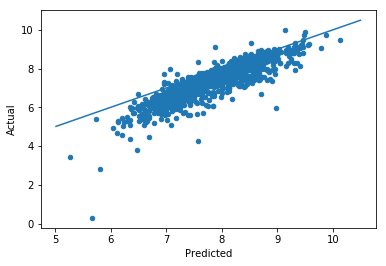

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm


# Add 45 degree line
v = plt.axis()
vmin = np.max([v[0],v[2]])
vmax = np.max([v[1],v[3]])
plt.plot([vmin,vmax],[vmin,vmax])